In [1]:
# Import the Titanic dataset
import pandas as pd
Location = "titanic3.xls"
df = pd.read_excel(Location)

In [2]:
# Observe the data
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Remove passengers who didn't survive and create a dataframe for survivors and non-survivors
df_survived= df[df["survived"] == 1]
df_died= df[df["survived"] == 0]

In [4]:
# Compare the average age of survivors to non-survivors
# Average age of survivors
df_survived['age'].mean()
# Average age of non-survivors
df_died['age'].mean()

30.54536882067851

In [5]:
# Compare the averae ticket price that survivors paid to non-survivors
# Average ticket price that survivors paid
df_survived['fare'].mean()

49.36118360000002

In [6]:
# Average ticket price that non-survivors paid
df_died['fare'].mean()

23.35383056930686

In [7]:
# Max fare of non-survivor
df_died['fare'].max()

263.0

In [8]:
#Min fare of survivor
df_survived['fare'].min()

0.0

In [9]:
# Correlation of df (both survivals and deceased)
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [10]:
# correlation of deceased
df_died.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,NaN,-0.458143,0.112207,0.085302,-0.536523,-0.034642
survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.458143,NaN,1.000000,-0.331391,-0.085371,0.197291,0.058809
sibsp,0.112207,NaN,-0.331391,1.000000,0.414934,0.255943,-0.099961
parch,0.085302,NaN,-0.085371,0.414934,1.000000,0.291510,0.051099
fare,-0.536523,NaN,0.197291,0.255943,0.291510,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [11]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [12]:
# Regression
import statsmodels.formula.api as sm
result = sm.ols(formula = 'survived ~ pclass + age + fare + parch', data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     47.27
Date:                Sat, 24 Jun 2017   Prob (F-statistic):           1.52e-36
Time:                        14:27:36   Log-Likelihood:                -653.41
No. Observations:                1045   AIC:                             1317.
Df Residuals:                    1040   BIC:                             1342.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0622      0.074     14.306      0.000       0.917       1.208
pclass        -0.2180      0.022     -9.911      0.000      -0.261      -0.175
age           -0.0070      0.001     -6.505      0.000      -0.009      -0.005
fare           0.0005      0.000      1.624      0.105      -0.000       0.001
parch          0.0451      0.018      2.570      0.010       0.011       0.080
==============================================================================
Omnibus:                     1100.843   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.100
Skew:                           0.350   Prob(JB):                     7.40e-20
Kurtosis:                       1.762   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Regression without intercept
import statsmodels.formula.api as sm
result = sm.ols(formula = 'survived ~ pclass + age + fare + parch-1', data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 24 Jun 2017   Prob (F-statistic):          2.65e-114
Time:                        14:27:36   Log-Likelihood:                -747.27
No. Observations:                1045   AIC:                             1503.
Df Residuals:                    1041   BIC:                             1522.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pclass         0.0610      0.011      5.487      0.000       0.039       0.083
age            0.0036      0.001      4.251      0.000       0.002       0.005
fare           0.0028      0.000      9.388      0.000       0.002       0.003
parch          0.0573      0.019      2.988      0.003       0.020       0.095
==============================================================================
Omnibus:                       20.088   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.244
Skew:                           0.347   Prob(JB):                     7.75e-27
Kurtosis:                       1.490   Cond. No.                         89.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Regression without intercept
import statsmodels.formula.api as sm
result = sm.ols(formula = 'survived ~  pclass + age +  fare  - 1', data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     227.7
Date:                Sat, 24 Jun 2017   Prob (F-statistic):          1.36e-113
Time:                        14:27:37   Log-Likelihood:                -751.73
No. Observations:                1045   AIC:                             1509.
Df Residuals:                    1042   BIC:                             1524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pclass         0.0720      0.011      6.829      0.000       0.051       0.093
age            0.0033      0.001      3.827      0.000       0.002       0.005
fare           0.0031      0.000     11.015      0.000       0.003       0.004
==============================================================================
Omnibus:                       23.450   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.106
Skew:                           0.376   Prob(JB):                     3.39e-29
Kurtosis:                       1.436   Cond. No.                         47.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

([<matplotlib.axis.XTick at 0xd9bf860>,
 <a list of 8 Text xticklabel objects>)

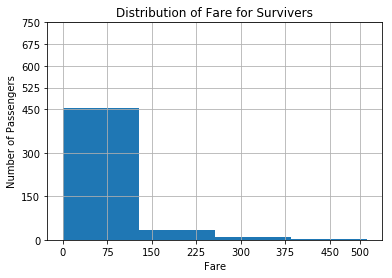

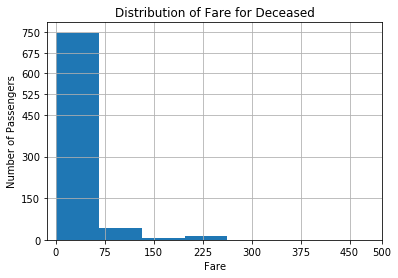

In [15]:
# Some Maps of the distribution of fare and age of s
import matplotlib.pyplot as plt
% matplotlib inline
df_survived.hist
df_survived.hist('fare', bins = 4)
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Fare for Survivers')
plt.yticks([0, 150, 300, 450, 525, 600, 675, 750])
plt.xticks([0, 75, 150, 225, 300, 375, 450, 500])
df_died.hist('fare', bins = 4)
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Fare for Deceased')
plt.yticks([0, 150, 300, 450, 525, 600, 675, 750])
plt.xticks([0, 75, 150, 225, 300, 375, 450, 500])

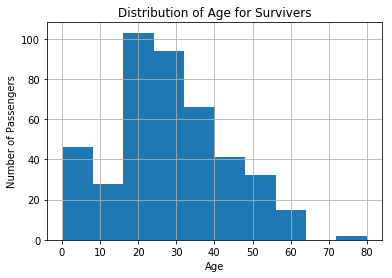

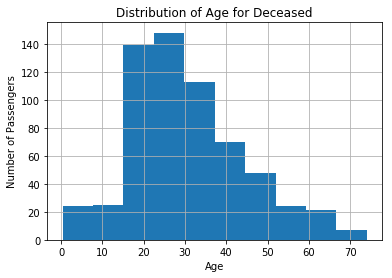

In [16]:
# Maps of dist for age
df_survived.hist('age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Age for Survivers')
df_died.hist('age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Age for Deceased')